## Preprocessing Spotify Data using a sample taken from Kaggle

Our data is available at:
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks



In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import missingno as msno 
import numpy as np
import re

In [ ]:
# import our tracks sample from google drive. Then, show a little sample
ts = pd.read_csv('/content/tracks_sample.csv', sep='_')
ts.head()

In [ ]:
# Count soundtracks from a single artist
count_singles = ts[~ts["id_artists"].str.contains(',')]
count_singles.id_artists.count()

# There are only 16 collaborations (sounds made by more than one artist)
# One artist may be a band

## Converting data

Since we will be working with Pig Latin Tuples due to our assignment, we need to convert them changing weird characters.
In case there is a different formatting, just write "()" 

In [ ]:
# función para convertir listas de los datos en strings compatibles con las tuplas de pig

def to_tuple(s):
  if type(s) == str:
    c = re.search(r"(.*\[)(.*)(\].*)", s)
    if c:
      center = c.group(2)
      # Use this to debug in case there are some border cases with our regex
     # import pdb
     # pdb.set_trace()

     # This will split our artists and collaborations
      lista_inicial = center.split(',')
      
      # There may be some characters that must be stripped, like '_ 
      lista = []
      for i in lista_inicial:
        lista.append(i.strip("' "))

      # Wrap last element with {} and add commas between
      # to make a result of the type {(element1), (element2), (element3)}
      final = "{"
      for j in lista[:-1]:
        final = final + "(" + j + ")" + ","
      final += "(" + lista[-1] + ")}"

      return final
    else:
      return "()"
  else:
    return "()"

In [ ]:
# Apply this function to our track sample 

ts_f = ts.copy()

# Transform our types to string
ts_f.artists = ts_f.artists.astype(str)
ts_f.id_artists = ts_f.id_artists.astype(str)

# And then transform them as PIG LATIN's tuples
ts_f.artists = ts_f.artists.apply(to_tuple)
ts_f.id_artists = ts_f.id_artists.apply(to_tuple)

# Show a sample to make sure this worked as intended
ts_f.head(50)

In [ ]:
# Import artists from a file in collab

ar = pd.read_csv('/content/artists.csv')
ar.head(50)

In [ ]:
# Apply the same functions as before to our artists columns

ar_f = ar.copy()

ar_f.genres = ar_f.genres.astype(str)

ar_f.genres = ar_f.genres.apply(to_tuple)

ar_f.head(50)

### Saving our data

Store these files as csv files, separated by a _ (since comma is being used for songs or artists inside a tuple) compressing them usin zip method

In [ ]:
compression_opts_a = dict(method='zip',
                        archive_name='artists_t.csv')  
ar_f.to_csv('artists_t.zip', index=False, sep='_',
          compression=compression_opts_a) 

In [ ]:
compression_opts_t = dict(method='zip',
                        archive_name='tracks_t.csv')  
ts_f.to_csv('tracks_t.zip', index=False, sep='_',
          compression=compression_opts_t) 

### Read files again and show some analysis

In [ ]:
# importar tracks desde archivo subido a colab

tr = pd.read_csv('/content/tracks.csv')
ar = pd.read_csv('/content/artists.csv')

In [ ]:
ar.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
ar.info()
# Look into empty registries. Only 13 empty registries in followers column

In [ ]:
msno.matrix(ar)

In [ ]:
# Show columns names. Also, show dimensions of our artist dataset (rows x columns).
print("Data:",str(ar.columns),"\n")
print("Filas y columnas:",str(ar.shape),"\n")

In [ ]:
# How many empty genres []
ar_g = ar[~(ar.followers == 0.0)]
print("no vacíos:", ar_g.shape)
print(ar.followers.value_counts())

In [ ]:
msno.matrix(tr)

In [ ]:
# Show columns names. Also, show dimensions of our tracks dataset (rows x columns).
print("Data:",str(tr.columns),"\n")
print("Filas y columnas:",str(tr.shape),"\n")

In [ ]:
# Show popularity range
print("Rango de popularity:", min(tr.release_date), "-", max(tr.release_date))
print(tr.explicit.value_counts())
# We will clasify popular those tracks with popularity score more or equal to 50 
# Since there are many unpopular tracks which have wrong, incorrect or empty data
tr_no = tr[tr.popularity < 50]
tr_si = tr[tr.popularity >= 50]
print(tr_no.shape)
print(tr_si.shape)
#44690 en 0

### Making some plots to understand our data better

In [ ]:
# Show histogram/distribution of our soundtracks according to their characteristics
# Like popularity, danceability, and so on.

#sns.histplot(data=tr, x="popularity", bins=25)
#sns.histplot(data=tr, x="danceability", bins=50)
#sns.histplot(data=tr, x="instrumentalness", bins=25)
#sns.histplot(data=tr, x="danceability", bins=25)
#sns.countplot(data=tr, x="key")

# Store some graphs for our presentation
plt.figure(figsize=(10,5))
ax=sns.histplot(data=tr, x="valence", bins=50)
ax.set_xlabel('danceability')
ax.set_ylabel('frequency')
ax.set_title('Distribución de frecuencias: "danceability"')

#plt.savefig('danceability.png', dpi=300)

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=tr, x="key")
ax.set_xlabel('key')
ax.set_ylabel('frequency')
ax.set_title('Distribución de frecuencias: "key"')

plt.savefig('key2.png', dpi=300)

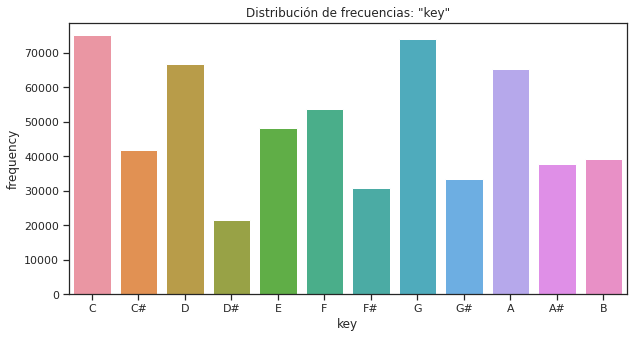

In [ ]:
labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']


plt.figure(figsize=(10,5))
ax=sns.countplot(data=tr, x="key")
ax.set_xlabel('key')
ax.set_ylabel('frequency')
# Set number of ticks for x-axis
ax.set_xticks(np.arange(len(labels)))
# Set ticks labels for x-axis
ax.set_xticklabels(labels)

ax.set_title('Distribución de frecuencias: "key"')

plt.savefig('key2.png', dpi=300)

In [ ]:
# Showing a distribution of popularity

plt.figure(figsize=(10,5))
ax=sns.histplot(data=tr, x="popularity", bins=50)
ax.set_xlabel('popularity')
ax.set_ylabel('frequency')
ax.set_title('Distribución de frecuencias: "popularity"')

plt.savefig('popularity.png', dpi=300)

In [ ]:
tr[tr.artists.str.contains('TOMORROW X TOGETHER')]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93748,3ObPkJQAgjAhTwYvDhPrAW,Blue Hour,76,209105,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2020-10-26,0.710,0.820,3,-4.362,0,0.0836,0.00962,0.000000,0.0871,0.746,112.005,4
211469,0EmYZZ8OqeALedVhijSjsg,CROWN,69,230707,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2019-03-04,0.623,0.800,5,-5.819,1,0.0424,0.04970,0.000000,0.0619,0.580,110.979,4
337140,1rqb2FCXVn2HNL1afJEnTr,9 and Three Quarters - Run Away,68,211867,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2019-10-21,0.639,0.756,1,-4.420,1,0.0606,0.00550,0.000000,0.1300,0.531,128.931,4
406444,3zLCX1TGMpsA67cW2pq6ut,永遠に光れ (Everlasting Shine),67,191147,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2020-08-18,0.527,0.891,7,-1.511,0,0.0724,0.11900,0.000000,0.2080,0.390,127.097,4
562156,5iLS8IJ5HA1xwd7R9q2hJ2,CROWN,53,230707,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2019-03-04,0.622,0.800,5,-5.819,1,0.0425,0.05050,0.000000,0.0619,0.580,110.977,4
562161,3psGiE7CXKwFpCH06Gk8tm,9 and Three Quarters (Run Away),53,211827,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2019-10-21,0.629,0.763,1,-4.410,1,0.0628,0.00428,0.000000,0.1150,0.521,128.970,4
562511,3nY2X9xh3FmqulGyEiYuCe,Cat & Dog,45,187573,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2019-03-04,0.843,0.794,8,-3.013,1,0.1470,0.06680,0.000223,0.1040,0.319,160.001,4
562665,0JQHGu03YJikcND4SENdiW,Blue Hour,56,209105,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2020-10-26,0.710,0.820,3,-4.362,0,0.0836,0.00962,0.000000,0.0871,0.746,112.005,4
562907,7vg9RiUGZOsKtKbmRo4yZB,Can't You See Me?,49,201440,0,['TOMORROW X TOGETHER'],['0ghlgldX5Dd6720Q3qFyQB'],2020-05-18,0.588,0.815,9,-3.042,0,0.0915,0.05560,0.000000,0.1930,0.664,139.974,4


In [ ]:
tr[tr.id_artists.str.contains("3UYZxxxrntUxxEeRycqHvq")]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
24327,0QfEupOVMNSA9z0f9HNFAc,"Rigoletto, Act I: Caro nome",0,450613,0,"['Giuseppe Verdi', 'Maria Callas', 'Milan La S...","['1JOQXgYdQV2yfrhewqx96o', '0bjdfjE8XbLa2Odstu...",1950,0.216,0.0649,4,-17.582,1,0.0493,0.985,0.043600,0.0680,0.0601,73.004,4
24339,0RWkYSfrNA9JGQG546OHSB,"La forza del destino: Act I: Me, pellegrina ed...",1,227427,0,"['Giuseppe Verdi', 'Maria Callas', 'Milan La S...","['1JOQXgYdQV2yfrhewqx96o', '0bjdfjE8XbLa2Odstu...",1950,0.227,0.0589,5,-20.789,1,0.0513,0.973,0.000034,0.2440,0.0665,184.825,4
26906,21SoChM94cdFo6wYs52njq,"I Puritani (1997 - Remaster), Act III: Vieni, ...",5,167640,0,"['Vincenzo Bellini', 'Maria Callas', 'Giuseppe...","['6AphpMkKDU4I3Z6XaGu1UV', '0bjdfjE8XbLa2Odstu...",1953,0.337,0.1380,11,-15.100,1,0.0374,0.980,0.003120,0.1030,0.1520,89.568,4
27008,6CiHZsaZX85koN7FyUMZp2,"I Puritani (1997 - Remaster), Act II: Ah! dolo...",7,333840,0,"['Vincenzo Bellini', 'Coro Del Teatro Alla Sca...","['6AphpMkKDU4I3Z6XaGu1UV', '7FMCfu4mkrKZd36Pj4...",1953,0.213,0.1360,7,-17.522,1,0.0397,0.990,0.689000,0.0895,0.0548,81.527,4
27053,00ix9pnoMdmVxfMZLEB56Q,"Bellini: I Puritani, Act 2: ""Qual novella?"" (C...",0,180307,0,"['Vincenzo Bellini', 'Nicola Rossi-Lemeni', 'C...","['6AphpMkKDU4I3Z6XaGu1UV', '01n5AdvwJa896npTFr...",1953,0.300,0.1560,8,-18.115,1,0.0388,0.982,0.298000,0.1730,0.0522,57.245,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565015,1YFlcTIv4EJIYa41FbCsG8,"La Bohème / Act 3: ""Mimì è una civetta""",3,80373,0,"['Giacomo Puccini', 'Carlo Bergonzi', 'Ettore ...","['0OzxPXyowUEQ532c9AmHUR', '3ALYsjti5tptGpfAgE...",1959-01-01,0.279,0.1790,9,-19.964,0,0.0347,0.973,0.001750,0.4500,0.1500,88.525,3
565017,3uPuMSGB8uvyGiX9e2EIwo,"La Bohème / Act 3: ""Marcello. Finalmente!""",3,79467,0,"['Giacomo Puccini', 'Carlo Bergonzi', 'Ettore ...","['0OzxPXyowUEQ532c9AmHUR', '3ALYsjti5tptGpfAgE...",1959-01-01,0.384,0.3130,6,-19.874,0,0.0818,0.954,0.011100,0.7190,0.4640,91.872,4
565020,5xLc8XLym4hYIgUV0Q0YE1,"La Bohème / Act 3: ""Mimì è tanto malata!""",3,199960,0,"['Giacomo Puccini', 'Carlo Bergonzi', 'Ettore ...","['0OzxPXyowUEQ532c9AmHUR', '3ALYsjti5tptGpfAgE...",1959-01-01,0.238,0.2160,10,-19.969,0,0.0440,0.958,0.000358,0.2080,0.0629,90.524,4
565022,6nGfwmTATN7TnJFHpdU6LS,"La Bohème / Act 3: ""Dunque: è proprio finita!....",3,385227,0,"['Giacomo Puccini', 'Carlo Bergonzi', 'Renata ...","['0OzxPXyowUEQ532c9AmHUR', '3ALYsjti5tptGpfAgE...",1959-01-01,0.175,0.1280,6,-19.290,1,0.0430,0.932,0.002200,0.0758,0.0399,88.033,4


In [ ]:
ar[ar.id.str.contains("6aMD1KAa5i3Myy61cR8FiW")]

,id,followers,genres,name,popularity
141185,6aMD1KAa5i3Myy61cR8FiW,7339.0,['barnsagor'],Tintin,57
